In [465]:
from gridWorld import gridWorld, distance
import numpy as np
import matplotlib.pyplot as plt

In [466]:
#TODO:
# implement Q-learning algorithm
# test it on the gridWorld environment
# ensure the robot does not move through walls
# do with random door placement for part b of the homework



In [ ]:
class QLearningAgent(gridWorld):
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1, epsilon_decay=0.95, time_steps=1000, episodes=100, part_b=False):

        # base gridWorld init
        self.option_1 = part_b
        super().__init__(option_1=self.option_1)

        # Q-learning parameters
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.time_steps = time_steps
        self.episodes = episodes
        self.epsilon_decay = epsilon_decay

        self.agent_actions = ['up', 'down', 'left', 'right', 'stay']
        self.reward_history = []

        self.q_table = {}
        for x in range(self.grid_size[0]):
            for y in range(self.grid_size[1]):
                state = (x, y)
                self.q_table[state] = {action: 0.0 for action in self.agent_actions}

        # print(self.q_table)


    def choose_action(self, state):
        # Epsilon-greedy action selection
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.agent_actions)  # Explore
        else:
            # Exploit: choose the action with the highest Q-value for the current state
            q_values = self.q_table[state]

            max_q = max(q_values.values()) # find the max Q-value

            best_actions = [action for action, q in q_values.items() if q == max_q]
            return np.random.choice(best_actions)  # break ties randomly
        

    def update_q_value(self, state, action, reward, next_state):
        # Q-learning update rule
        max_future_q = max(self.q_table[next_state].values())

        current_q = self.q_table[state][action]

        new_q = current_q + self.alpha * (reward + self.gamma * max_future_q - current_q)
        self.q_table[state][action] = new_q
        

    def train(self, show_progress=False):

        for episode in range(self.episodes):
            curr_state = tuple(self.reset())  # Reset agent to starting position
            total_reward = 0
            
            for t in range(self.time_steps):

                action = self.choose_action(curr_state)

                # Take action and observe next state and reward - fxn checks for walls too / valid moves
                next_state, reward = self.step(action)
                next_state = tuple(next_state)

                self.update_q_value(curr_state, action, reward, next_state)

                curr_state = next_state
                total_reward += reward

                if reward == 20:  # Goal reached
                    break

            
            self.reward_history.append(total_reward)

            # decay epsilon
            self.epsilon *= self.epsilon_decay

            if show_progress and (episode % 50 == 0 or episode == self.episodes - 1):
                print(f"Episode {episode+1}/{self.episodes}, Total Reward: {total_reward}")

    
    def plot_rewards(self):
        plt.plot(self.reward_history)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Total Reward per Episode')
        plt.show()

    def plot_Q_table(self):
        # Plot the Q table for each state and action as a heatmap
        # stay action not included in the plots

        # setup q_table array for plotting
        q_table = np.zeros((self.grid_size[1], self.grid_size[0], 5))

        for x in range(self.grid_size[0]):
            for y in range(self.grid_size[1]):
                q_values = self.q_table[(x, y)]
                for i, action in enumerate(self.agent_actions):
                    q_table[y, x, i] = q_values[action]
        
        for i, action in enumerate(self.agent_actions[:-1]):
            plt.subplot(2, 2, i+1)
            plt.imshow(q_table[:, :, i], cmap="viridis", vmin=np.min(q_table), vmax=np.max(q_table))
            plt.gca().invert_yaxis()
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title(f"Q Table for Action: {action}")

        # Plot color bar
        plt.colorbar(ax=plt.gcf().get_axes(), shrink=0.9, location="right")

    

    

Episode 1/300, Total Reward: -172
Episode 51/300, Total Reward: 13
Episode 101/300, Total Reward: 13
Episode 151/300, Total Reward: 14
Episode 201/300, Total Reward: 14
Episode 251/300, Total Reward: 13
Episode 300/300, Total Reward: 11


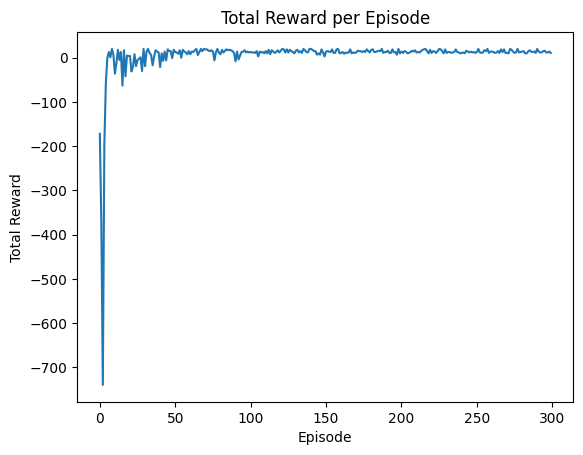

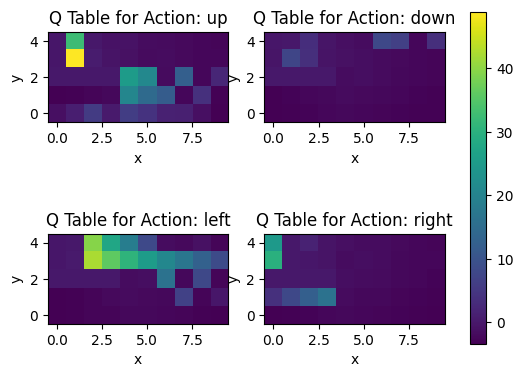

In [468]:
# part a

# parameters
epsilon = 0.9
alpha = 0.25
gamma = 0.9
time_steps = 2000
episodes = 300
epsilon_decay = 0.9
option_1 = False


# test the Q-learning agent
q_agent = QLearningAgent(alpha=alpha, gamma=gamma, epsilon=epsilon, epsilon_decay=epsilon_decay, time_steps=time_steps, episodes=episodes, part_b=option_1)
q_agent.train(show_progress=True)
q_agent.plot_rewards()
q_agent.plot_Q_table()


Episode 1/300, Total Reward: -243
Episode 51/300, Total Reward: -79
Episode 101/300, Total Reward: 8
Episode 151/300, Total Reward: 11
Episode 201/300, Total Reward: -169
Episode 251/300, Total Reward: -55
Episode 300/300, Total Reward: -117


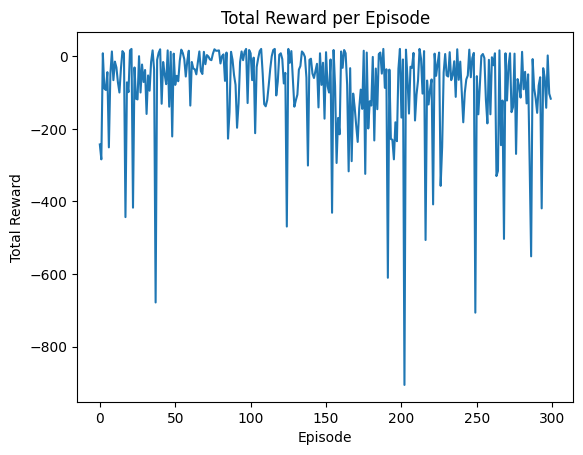

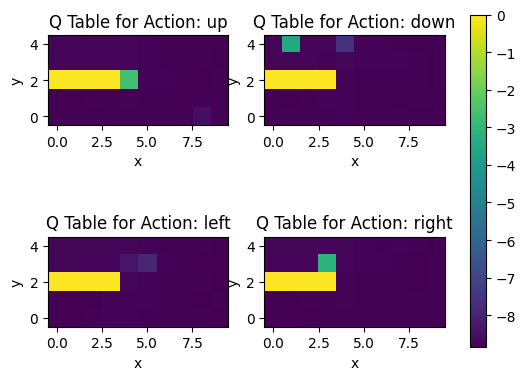

In [469]:
# test the Q-learning agent
option_1 = True
q_agent = QLearningAgent(alpha=alpha, gamma=gamma, epsilon=epsilon, epsilon_decay=epsilon_decay, time_steps=time_steps, episodes=episodes, part_b=option_1)
q_agent.train(show_progress=True)
q_agent.plot_rewards()
q_agent.plot_Q_table()


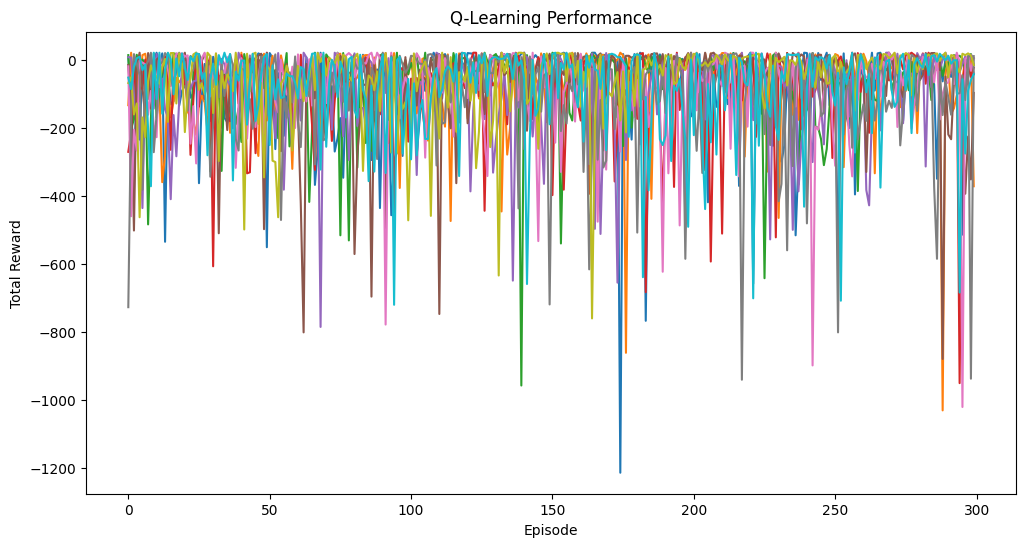

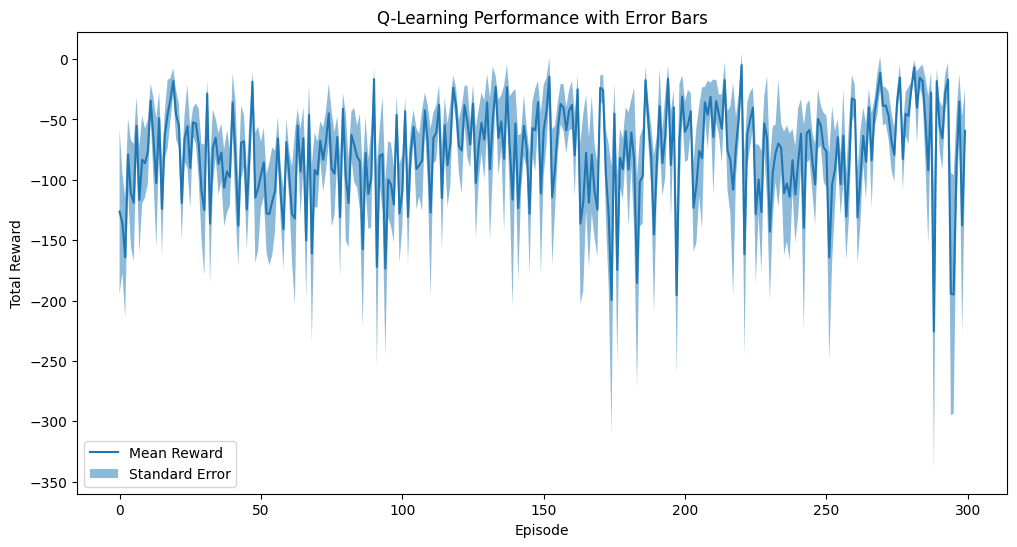

In [470]:
# experiments to run the algorithm for 10 times and average the reward history
num_experiments = 10
all_reward_histories = []
option_1 = True

for experiment in range(num_experiments):
    agent = QLearningAgent(alpha=alpha, gamma=gamma, epsilon=epsilon, epsilon_decay=epsilon_decay, time_steps=time_steps, episodes=episodes, part_b=option_1)
    agent.train()
    all_reward_histories.append(agent.reward_history)


# plot all reward histories
plt.figure(figsize=(12, 6))
for rewards in all_reward_histories:
    plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Performance')
plt.show()


# plot the std error bars over the reward histories
mean_rewards = np.mean(all_reward_histories, axis=0)
std_rewards = np.std(all_reward_histories, axis=0)
stderr_rewards = std_rewards / np.sqrt(num_experiments)
plt.figure(figsize=(12, 6))
plt.plot(mean_rewards, label='Mean Reward') 
plt.fill_between(range(len(mean_rewards)), mean_rewards - stderr_rewards, mean_rewards + stderr_rewards, alpha=0.5, label='Standard Error')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Performance with Error Bars')
plt.legend()
plt.show()
